# CarPrice_Pridction Business_Case Project ML

### Importing all Neccesary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv('audi.csv')
df.head(5)

model  year  price transmission  mileage fuelType  tax   mpg  engineSize
0    A1  2017  12500       Manual    15735   Petrol  150  55.4         1.4
1    A6  2016  16500    Automatic    36203   Diesel   20  64.2         2.0
2    A1  2016  11000       Manual    29946   Petrol   30  55.4         1.4
3    A4  2017  16800    Automatic    25952   Diesel  145  67.3         2.0
4    A3  2019  17300       Manual     1998   Petrol  145  49.6         1.0

In [4]:
df.shape

(10668, 9)

In [5]:
len(df)

10668

In [6]:
df.size

96012

In [7]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [8]:
df.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


In [10]:
df.duplicated().sum()

103

In [11]:
df.loc[df.duplicated()]

model  year  price transmission  mileage fuelType  tax   mpg  engineSize
273     Q3  2019  34485    Automatic       10   Diesel  145  47.1         2.0
764     Q2  2019  22495       Manual     1000   Diesel  145  49.6         1.6
784     Q3  2015  13995       Manual    35446   Diesel  145  54.3         2.0
967     Q5  2019  31998    Semi-Auto      100   Petrol  145  33.2         2.0
990     Q2  2019  22495       Manual     1000   Diesel  145  49.6         1.6
...    ...   ...    ...          ...      ...      ...  ...   ...         ...
9508    A4  2019  26990    Automatic     2250   Diesel  145  50.4         2.0
9521    Q3  2019  26990       Manual       10   Petrol  145  40.9         1.5
9529    Q5  2019  44990    Automatic       10   Diesel  145  36.2         2.0
9550    Q3  2019  29995       Manual       10   Petrol  145  39.8         1.5
9597    Q3  2019  28490       Manual       10   Diesel  145  42.8         2.0

[103 rows x 9 columns]

In [12]:
df.describe()

year          price        mileage           tax           mpg  \
count  10668.000000   10668.000000   10668.000000  10668.000000  10668.000000   
mean    2017.100675   22896.685039   24827.244001    126.011436     50.770022   
std        2.167494   11714.841888   23505.257205     67.170294     12.949782   
min     1997.000000    1490.000000       1.000000      0.000000     18.900000   
25%     2016.000000   15130.750000    5968.750000    125.000000     40.900000   
50%     2017.000000   20200.000000   19000.000000    145.000000     49.600000   
75%     2019.000000   27990.000000   36464.500000    145.000000     58.900000   
max     2020.000000  145000.000000  323000.000000    580.000000    188.300000   

         engineSize  
count  10668.000000  
mean       1.930709  
std        0.602957  
min        0.000000  
25%        1.500000  
50%        2.000000  
75%        2.000000  
max        6.300000

In [13]:
df.describe(include='object')

model transmission fuelType
count   10668        10668    10668
unique     26            3        3
top        A3       Manual   Diesel
freq     1929         4369     5577

## Profiling Report

In [153]:
from ydata_profiling import ProfileReport

In [154]:
ProfileReport(df, title='Profiling Report')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [16]:
df['model'].unique()

array([' A1', ' A6', ' A4', ' A3', ' Q3', ' Q5', ' A5', ' S4', ' Q2',
       ' A7', ' TT', ' Q7', ' RS6', ' RS3', ' A8', ' Q8', ' RS4', ' RS5',
       ' R8', ' SQ5', ' S8', ' SQ7', ' S3', ' S5', ' A2', ' RS7'],
      dtype=object)

In [17]:
pd.DataFrame(df['model'].value_counts()).reset_index()

index  model
0     A3   1929
1     Q3   1417
2     A4   1381
3     A1   1347
4     A5    882
5     Q5    877
6     Q2    822
7     A6    748
8     Q7    397
9     TT    336
10    A7    122
11    A8    118
12    Q8     69
13   RS6     39
14   RS3     33
15   RS4     31
16   RS5     29
17    R8     28
18    S3     18
19   SQ5     16
20    S4     12
21   SQ7      8
22    S8      4
23    S5      3
24    A2      1
25   RS7      1

In [18]:
df['transmission'].unique()

array(['Manual', 'Automatic', 'Semi-Auto'], dtype=object)

In [19]:
df['transmission'].value_counts().to_frame()

transmission
Manual             4369
Semi-Auto          3591
Automatic          2708

In [20]:
df['fuelType'].value_counts().to_frame()

fuelType
Diesel      5577
Petrol      5063
Hybrid        28

In [21]:
engine = df['engineSize'].value_counts().to_frame().reset_index()
engine.rename(columns={'index':'Engine_size','engineSize':'Counts'})

Engine_size  Counts
0           2.0    5169
1           1.4    1594
2           3.0    1149
3           1.6     913
4           1.5     744
5           1.0     558
6           4.0     154
7           1.8     126
8           2.5      61
9           0.0      57
10          2.9      49
11          1.2      31
12          4.2      25
13          5.2      23
14          3.2       5
15          1.9       4
16          2.7       3
17          4.1       2
18          6.3       1

### Basic standard correlation coefficient

In [22]:
df.corr('pearson')

year     price   mileage       tax       mpg  engineSize
year        1.000000  0.592581 -0.789667  0.093066 -0.351281   -0.031582
price       0.592581  1.000000 -0.535357  0.356157 -0.600334    0.591262
mileage    -0.789667 -0.535357  1.000000 -0.166547  0.395103    0.070710
tax         0.093066  0.356157 -0.166547  1.000000 -0.635909    0.393075
mpg        -0.351281 -0.600334  0.395103 -0.635909  1.000000   -0.365621
engineSize -0.031582  0.591262  0.070710  0.393075 -0.365621    1.000000

### Spearman rank correlation

In [23]:
df.corr('spearman')

year     price   mileage       tax       mpg  engineSize
year        1.000000  0.765990 -0.862416  0.194361 -0.532725    0.026446
price       0.765990  1.000000 -0.709120  0.422473 -0.749557    0.465471
mileage    -0.862416 -0.709120  1.000000 -0.180303  0.530829    0.034433
tax         0.194361  0.422473 -0.180303  1.000000 -0.601924    0.303448
mpg        -0.532725 -0.749557  0.530829 -0.601924  1.000000   -0.368087
engineSize  0.026446  0.465471  0.034433  0.303448 -0.368087    1.000000

In [24]:
df.head()

model  year  price transmission  mileage fuelType  tax   mpg  engineSize
0    A1  2017  12500       Manual    15735   Petrol  150  55.4         1.4
1    A6  2016  16500    Automatic    36203   Diesel   20  64.2         2.0
2    A1  2016  11000       Manual    29946   Petrol   30  55.4         1.4
3    A4  2017  16800    Automatic    25952   Diesel  145  67.3         2.0
4    A3  2019  17300       Manual     1998   Petrol  145  49.6         1.0

In [25]:
df['year'].unique()

array([2017, 2016, 2019, 2015, 2014, 2018, 2013, 2020, 2004, 2009, 2012,
       2010, 2007, 2011, 2008, 2003, 2005, 2002, 2006, 1998, 1997],
      dtype=int64)

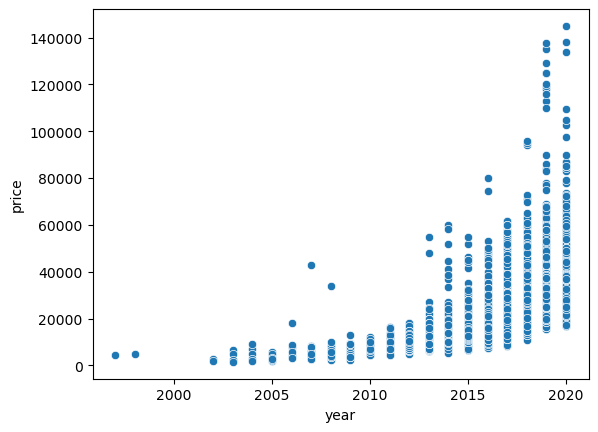

In [26]:
sns.scatterplot(data=df, x='year',y='price')
plt.show()

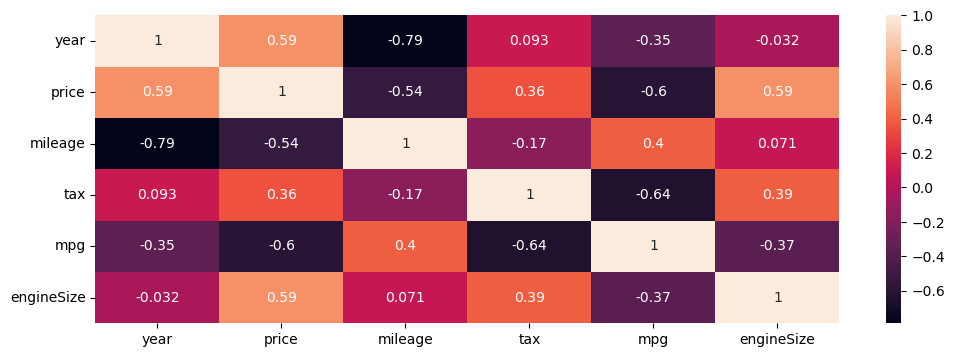

In [27]:
plt.figure(figsize=(12,4))
sns.heatmap(df.corr(),annot=True)
plt.show()

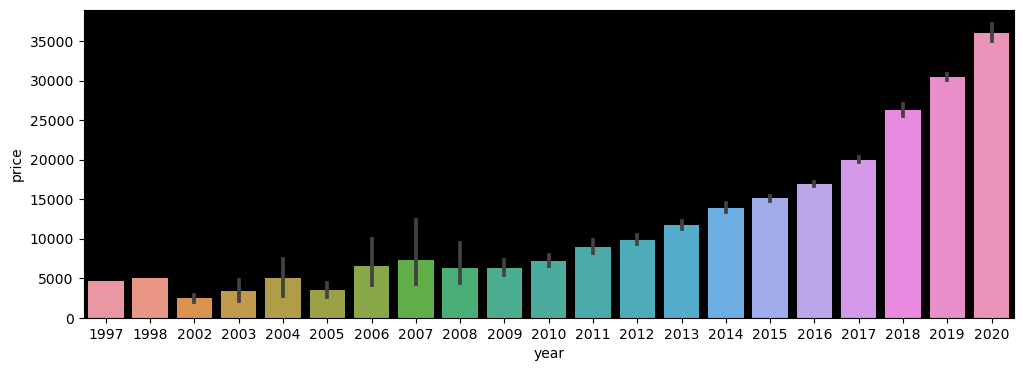

In [28]:
plt.figure(figsize=(12,4))
sns.barplot(data=df, x='year', y='price')
ax=plt.gca()
ax.set_facecolor('black')
plt.show()

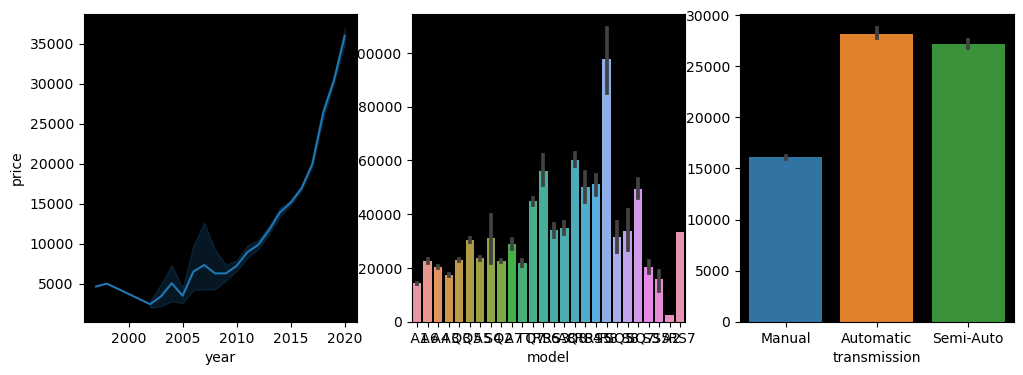

In [29]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.lineplot(data=df, x='year',y='price')
ax=plt.gca()
ax.set_facecolor('black')
plt.subplot(1,3,2)
sns.barplot(data=df, x='model',y='price')
ax=plt.gca()
ax.set_facecolor('black')
plt.subplot(1,3,3)
sns.barplot(data=df, x='transmission',y='price')
ax=plt.gca()
ax.set_facecolor('black')
plt.show()

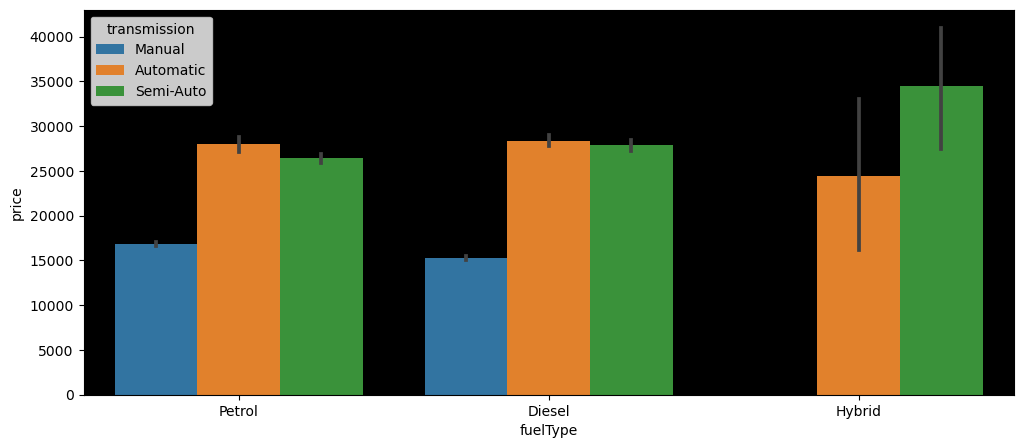

In [30]:
plt.figure(figsize=(12,5))
sns.barplot(data=df, x='fuelType', y='price',hue='transmission')
ax=plt.gca()
ax.set_facecolor('black')
plt.show()

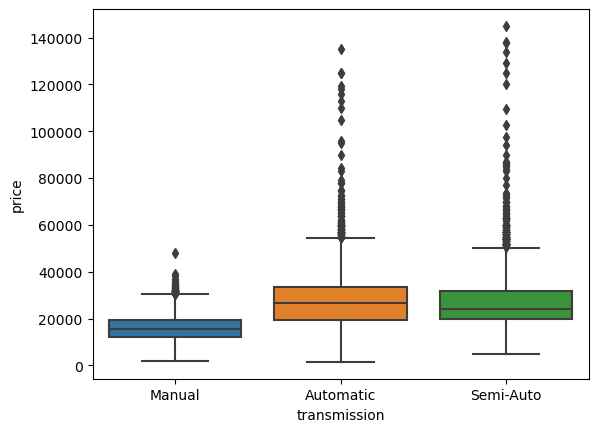

In [31]:
sns.boxplot(data=df, x='transmission',y='price')
plt.show()

## Outlier Detection for Price

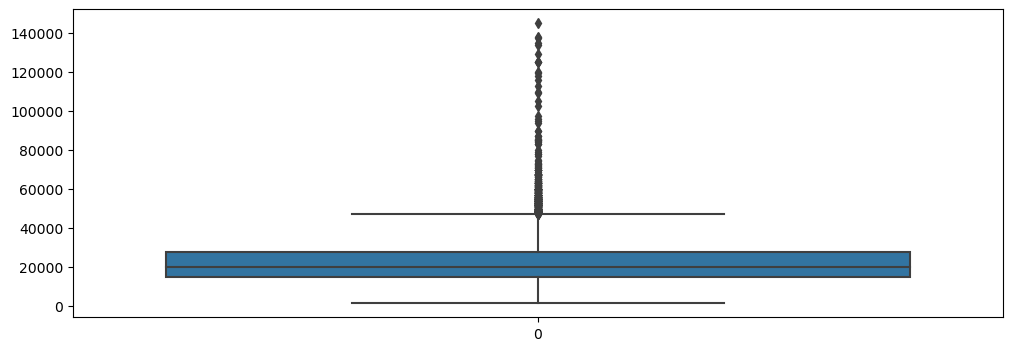

In [32]:
plt.figure(figsize=(12,4))
sns.boxplot(df['price'])
plt.show()

In [33]:
display(df[['transmission','price']].describe())

price
count   10668.000000
mean    22896.685039
std     11714.841888
min      1490.000000
25%     15130.750000
50%     20200.000000
75%     27990.000000
max    145000.000000

### Finding the Outliers as Inter Quantile Range

In [34]:
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)

In [35]:
q1,q3

(15130.75, 27990.0)

In [36]:
IQR = q3-q1
IQR

12859.25

In [37]:
upper_whisker = q3+1.5*IQR

In [38]:
upper_whisker

47278.875

## Outliers for Data

In [39]:
df[df['price'] > 47278.875]

model  year  price transmission  mileage fuelType  tax   mpg  engineSize
198      Q7  2020  62985    Semi-Auto       10   Diesel  145  33.2         3.0
221      Q7  2019  49985    Automatic       10   Diesel  145  33.2         3.0
222      Q7  2019  59995    Automatic       10   Diesel  145  33.2         3.0
223      Q5  2020  47895    Semi-Auto       10   Petrol  145  30.7         2.0
247      Q7  2019  56985    Automatic     1510   Diesel  145  33.2         3.0
...     ...   ...    ...          ...      ...      ...  ...   ...         ...
10530   RS6  2016  52950    Automatic    27000   Petrol  325  29.4         4.0
10546    A4  2020  49000    Automatic       38   Diesel  145  39.2         3.0
10597    Q7  2020  68000    Automatic     4162   Diesel  145  32.1         3.0
10602    Q7  2020  53792    Automatic     3182   Diesel  145  33.2         3.0
10648   RS6  2016  49990    Automatic    24000   Petrol  325  29.4         4.0

[443 rows x 9 columns]

In [40]:
lower_whisker = q1-1.5*IQR
lower_whisker

-4158.125

In [41]:
df[df['price'] < -4158.125]

Empty DataFrame
Columns: [model, year, price, transmission, mileage, fuelType, tax, mpg, engineSize]
Index: []

### Outliers Detection for Mannual Car Price

In [42]:
df.groupby('transmission')['price'].count()

transmission
Automatic    2708
Manual       4369
Semi-Auto    3591
Name: price, dtype: int64

In [43]:
mannual = df[df['transmission']=='Manual']['price'].to_frame()
mannual

price
0      12500
2      11000
4      17300
7      11750
8      10200
...      ...
10662  12695
10663  16999
10664  16999
10665  17199
10667  15999

[4369 rows x 1 columns]

In [44]:
mannual.describe()

price
count   4369.000000
mean   16101.033417
std     5519.089663
min     1699.000000
25%    11995.000000
50%    15700.000000
75%    19325.000000
max    47995.000000

In [45]:
m1 = mannual['price'].quantile(0.25)
m3 = mannual['price'].quantile(0.75)

In [46]:
MIQR = m3-m1

In [47]:
mupper_whisker = m3+1.5*MIQR
mupper_whisker

30320.0

In [48]:
mannual[mannual['price'] > 30320.0].T

264    320    363    514    515    625    713    854    1175   1869  \
price  31985  31995  31985  34259  35131  35995  37995  30995  30491  47995   

       ...   7668   7694   8674   9334   9437   9468   9498   9563   9564  \
price  ...  30990  30990  31495  32990  32490  38990  33490  30990  30990   

        9618  
price  33990  

[1 rows x 46 columns]

### Outliers Detection for Automatic Car Price

In [49]:
automatic = df[df['transmission']=='Automatic']['price'].to_frame()
automatic.T

1      3      5      6      11     15     16     17     18     20     \
price  16500  16800  13900  13250  16500  14500  15700  13900  19000  17300   

       ...  10640  10641  10642  10643  10644  10647  10648  10655  10660  \
price  ...  37000  25000  33000  30000  25000  21000  49990  29995   9995   

       10666  
price  19499  

[1 rows x 2708 columns]

In [50]:
a1 = automatic['price'].quantile(0.25)
a3 = automatic['price'].quantile(0.75)

In [51]:
AIQR = a3-a1

In [52]:
aupper_whisker = a3+1.5*AIQR
aupper_whisker

54801.5

In [53]:
automatic[automatic['price'] > 54801.5].T

222    247    640    732    1077   1107   1163   1196   1545   1838   \
price  59995  56985  60995  55500  56996  84496  63796  59996  56490  77888   

       ...  10072  10085  10098   10225  10339   10468  10470  10486  10521  \
price  ...  74500  57895  69890  104948  72500  125000  70000  59500  58000   

       10597  
price  68000  

[1 rows x 101 columns]

### Outliers Detection for Semi_Automatic Car Price

In [54]:
semi_auto = df[df['transmission']=='Semi-Auto']['price'].to_frame()
semi_auto.T

90     91     99     101    105    106    168    170    171    174    \
price  25499  25499  25499  31000  26000  30000  11498  18998  25498  19998   

       ...  10512  10514  10533  10581  10582  10586  10654  10656  10657  \
price  ...  16999  27999  18950  23000  16495  31000  16495  15495  20995   

       10659  
price  27995  

[1 rows x 3591 columns]

In [55]:
sa1 = semi_auto['price'].quantile(0.25)
sa3 = semi_auto['price'].quantile(0.75)

In [56]:
SAIQR = sa3-sa1

In [57]:
saupper_whisker = sa3+1.5*SAIQR
saupper_whisker

50268.0

In [58]:
automatic[automatic['price'] > 50268.0].T

222    247    293    640    732    1077   1107   1163   1187   1196   \
price  59995  56985  52985  60995  55500  56996  84496  63796  52496  59996   

       ...  10339   10468  10470  10486  10496  10521  10526  10530  10597  \
price  ...  72500  125000  70000  59500  51495  58000  51000  52950  68000   

       10602  
price  53792  

[1 rows x 155 columns]

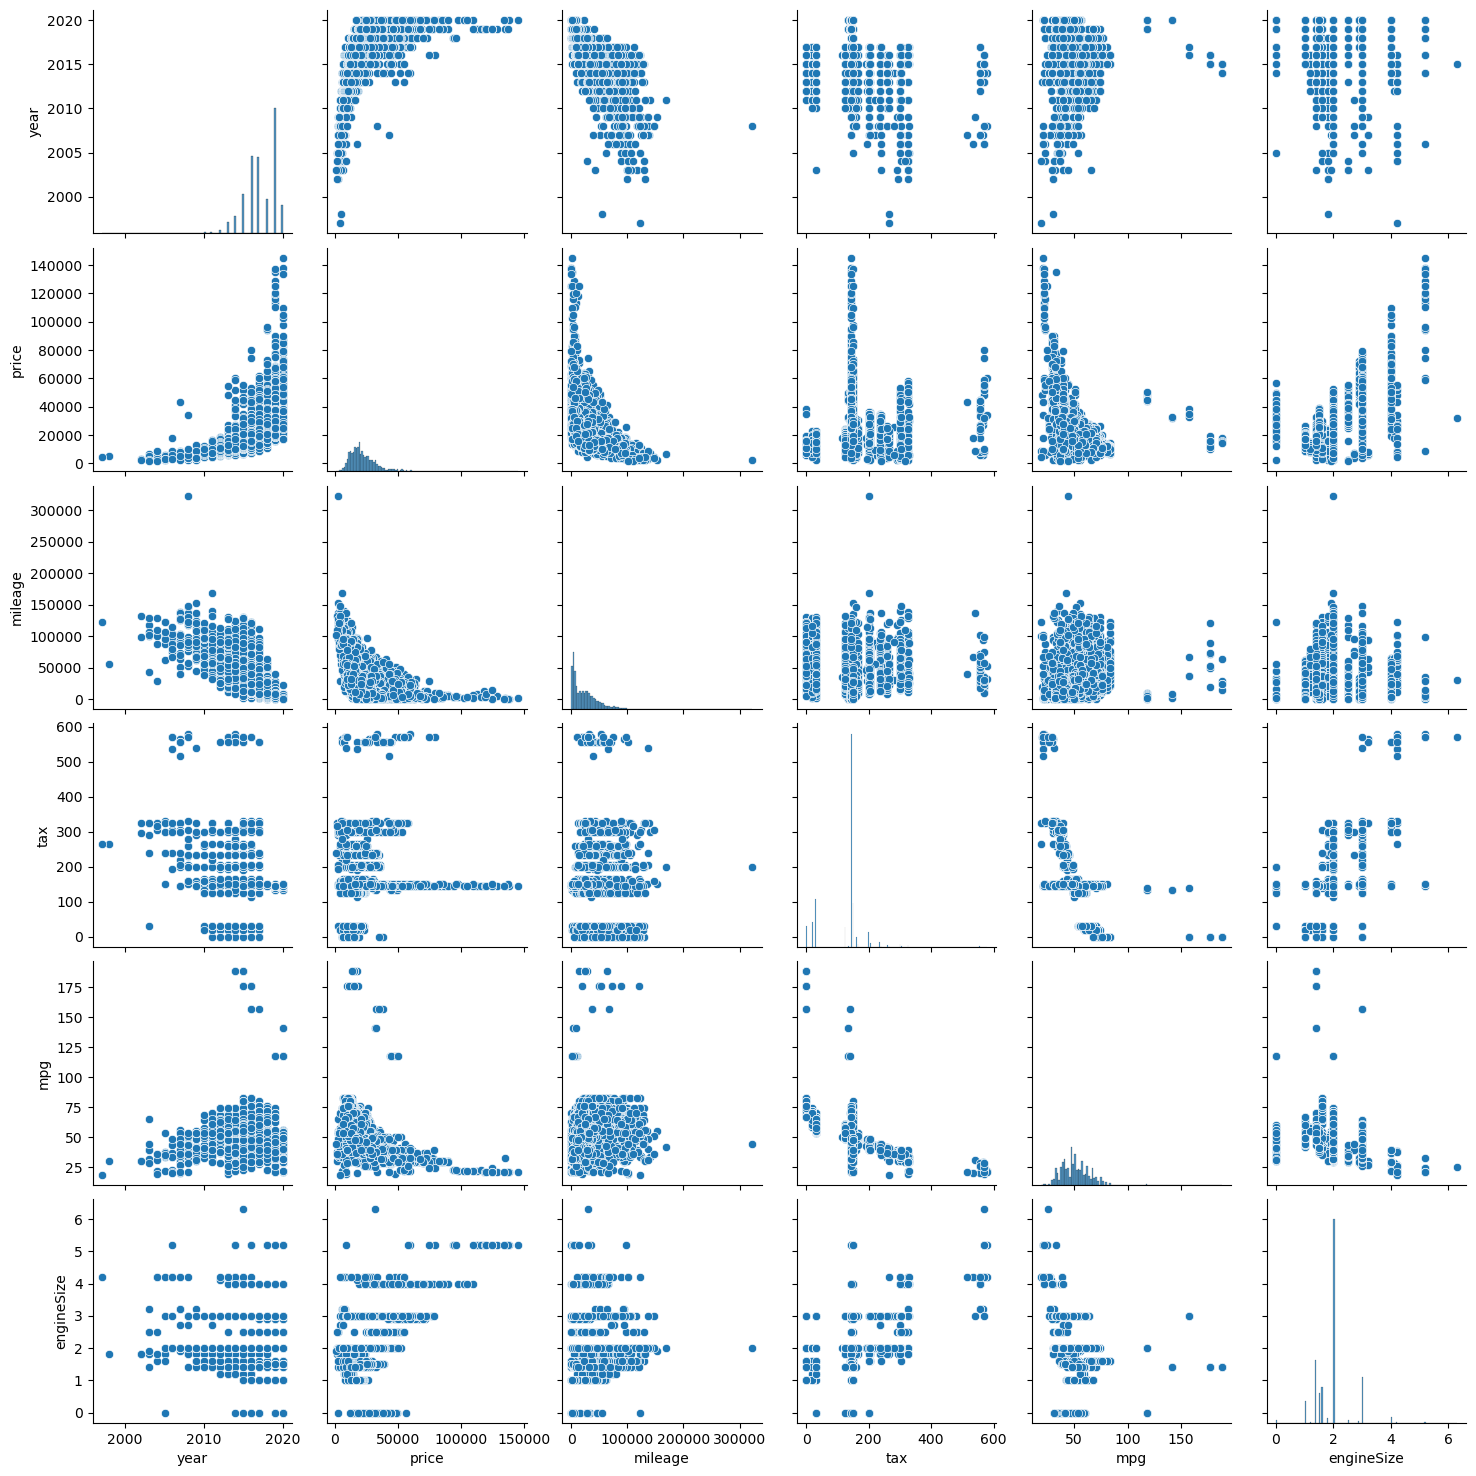

In [59]:
sns.pairplot(df)
plt.show()

In [60]:
df.sample(10)

model  year  price transmission  mileage fuelType  tax   mpg  engineSize
5208     A4  2018  21450    Semi-Auto     9555   Petrol  145  50.4         1.4
8535     A1  2016   8500       Manual    75869   Diesel    0  80.7         1.6
5935     A3  2019  23900       Manual     1529   Diesel  150  52.3         1.6
10559    Q2  2019  24500    Automatic     8334   Petrol  145  40.9         1.5
3551     A3  2013  11980    Semi-Auto    59386   Petrol  125  50.4         1.8
6730     A3  2017  23475    Semi-Auto    27524   Petrol  160  43.5         2.0
2926     A4  2018  23132    Semi-Auto    15475   Petrol  145  50.4         2.0
4888     A3  2017  13500       Manual    51578   Petrol   20  60.1         1.4
1800     A4  2017  16995    Automatic    21641   Petrol  145  51.4         1.4
2887     A3  2018  20971    Semi-Auto    22604   Petrol  145  56.5         1.5

In [61]:
x = df.iloc[:,[0,1,3,4,5,6,7,8]].values
x

array([[' A1', 2017, 'Manual', ..., 150, 55.4, 1.4],
       [' A6', 2016, 'Automatic', ..., 20, 64.2, 2.0],
       [' A1', 2016, 'Manual', ..., 30, 55.4, 1.4],
       ...,
       [' A3', 2020, 'Manual', ..., 150, 49.6, 1.0],
       [' Q3', 2017, 'Automatic', ..., 150, 47.9, 1.4],
       [' Q3', 2016, 'Manual', ..., 150, 47.9, 1.4]], dtype=object)

In [62]:
x.shape

(10668, 8)

In [63]:
y = df.iloc[:,[2]].values
y

array([[12500],
       [16500],
       [11000],
       ...,
       [17199],
       [19499],
       [15999]], dtype=int64)

In [64]:
y.shape

(10668, 1)

In [65]:
pd.DataFrame(x).head(5)

0     1          2      3       4    5     6    7
0   A1  2017     Manual  15735  Petrol  150  55.4  1.4
1   A6  2016  Automatic  36203  Diesel   20  64.2  2.0
2   A1  2016     Manual  29946  Petrol   30  55.4  1.4
3   A4  2017  Automatic  25952  Diesel  145  67.3  2.0
4   A3  2019     Manual   1998  Petrol  145  49.6  1.0

In [66]:
pd.DataFrame(y).head(5)

0
0  12500
1  16500
2  11000
3  16800
4  17300

## Label Encoding

### Label Encoding for Model and fuel type Column

In [67]:
from sklearn.preprocessing import LabelEncoder

In [68]:
le1 = LabelEncoder()
le1

LabelEncoder()

In [69]:
x[:,0]

array([' A1', ' A6', ' A1', ..., ' A3', ' Q3', ' Q3'], dtype=object)

In [70]:
x[:,0] = le1.fit_transform(x[:,0])
x[:,0]

array([0, 5, 0, ..., 2, 9, 9], dtype=object)

In [71]:
le2 = LabelEncoder()
le2

LabelEncoder()

In [72]:
x[:,4]

array(['Petrol', 'Diesel', 'Petrol', ..., 'Petrol', 'Petrol', 'Petrol'],
      dtype=object)

In [73]:
x[:,4]=le2.fit_transform(x[:,4])
x[:,4]

array([2, 0, 2, ..., 2, 2, 2], dtype=object)

In [74]:
pd.DataFrame(x).head(5)

0     1          2      3  4    5     6    7
0  0  2017     Manual  15735  2  150  55.4  1.4
1  5  2016  Automatic  36203  0   20  64.2  2.0
2  0  2016     Manual  29946  2   30  55.4  1.4
3  3  2017  Automatic  25952  0  145  67.3  2.0
4  2  2019     Manual   1998  2  145  49.6  1.0

### One hot Encoding for Transmission type

In [75]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [76]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[2])],remainder='passthrough')
ct

ColumnTransformer(remainder='passthrough',
                  transformers=[('encoder', OneHotEncoder(), [2])])

In [77]:
x = ct.fit_transform(x)
x

array([[0.0, 1.0, 0.0, ..., 150, 55.4, 1.4],
       [1.0, 0.0, 0.0, ..., 20, 64.2, 2.0],
       [0.0, 1.0, 0.0, ..., 30, 55.4, 1.4],
       ...,
       [0.0, 1.0, 0.0, ..., 150, 49.6, 1.0],
       [1.0, 0.0, 0.0, ..., 150, 47.9, 1.4],
       [0.0, 1.0, 0.0, ..., 150, 47.9, 1.4]], dtype=object)

In [78]:
x.shape

(10668, 10)

In [79]:
pd.DataFrame(x)

0    1    2  3     4      5  6    7     8    9
0      0.0  1.0  0.0  0  2017  15735  2  150  55.4  1.4
1      1.0  0.0  0.0  5  2016  36203  0   20  64.2  2.0
2      0.0  1.0  0.0  0  2016  29946  2   30  55.4  1.4
3      1.0  0.0  0.0  3  2017  25952  0  145  67.3  2.0
4      0.0  1.0  0.0  2  2019   1998  2  145  49.6  1.0
...    ...  ...  ... ..   ...    ... ..  ...   ...  ...
10663  0.0  1.0  0.0  2  2020   4018  2  145  49.6  1.0
10664  0.0  1.0  0.0  2  2020   1978  2  150  49.6  1.0
10665  0.0  1.0  0.0  2  2020    609  2  150  49.6  1.0
10666  1.0  0.0  0.0  9  2017   8646  2  150  47.9  1.4
10667  0.0  1.0  0.0  9  2016  11855  2  150  47.9  1.4

[10668 rows x 10 columns]

### Standardization Featuring

In [80]:
from sklearn.preprocessing import StandardScaler

In [81]:
sc = StandardScaler()
sc

StandardScaler()

In [82]:
x = sc.fit_transform(x)
x

array([[-0.58326752,  1.2007284 , -0.71233307, ...,  0.35714729,
         0.35755001, -0.88021837],
       [ 1.71447913, -0.83282781, -0.71233307, ..., -1.57832278,
         1.03713001,  0.11492465],
       [-0.58326752,  1.2007284 , -0.71233307, ..., -1.42944047,
         0.35755001, -0.88021837],
       ...,
       [-0.58326752,  1.2007284 , -0.71233307, ...,  0.35714729,
        -0.09035499, -1.54364705],
       [ 1.71447913, -0.83282781, -0.71233307, ...,  0.35714729,
        -0.22163749, -0.88021837],
       [-0.58326752,  1.2007284 , -0.71233307, ...,  0.35714729,
        -0.22163749, -0.88021837]])

In [83]:
pd.DataFrame(x)

0         1         2         3         4         5         6  \
0     -0.583268  1.200728 -0.712333 -1.123544 -0.046450 -0.386836  1.050783   
1      1.714479 -0.832828 -0.712333 -0.160831 -0.507834  0.483989 -0.954181   
2     -0.583268  1.200728 -0.712333 -1.123544 -0.507834  0.217781  1.050783   
3      1.714479 -0.832828 -0.712333 -0.545916 -0.046450  0.047853 -0.954181   
4     -0.583268  1.200728 -0.712333 -0.738459  0.876318 -0.971285  1.050783   
...         ...       ...       ...       ...       ...       ...       ...   
10663 -0.583268  1.200728 -0.712333 -0.738459  1.337702 -0.885343  1.050783   
10664 -0.583268  1.200728 -0.712333 -0.738459  1.337702 -0.972136  1.050783   
10665 -0.583268  1.200728 -0.712333 -0.738459  1.337702 -1.030381  1.050783   
10666  1.714479 -0.832828 -0.712333  0.609339 -0.046450 -0.688442  1.050783   
10667 -0.583268  1.200728 -0.712333  0.609339 -0.507834 -0.551913  1.050783   

              7         8         9  
0      0.357147  0.357550 -0.880218  
1     -1.578323  1.037130  0.114925  
2     -1.429440  0.357550 -0.880218  
3      0.282706  1.276528  0.114925  
4      0.282706 -0.090355 -1.543647  
...         ...       ...       ...  
10663  0.282706 -0.090355 -1.543647  
10664  0.357147 -0.090355 -1.543647  
10665  0.357147 -0.090355 -1.543647  
10666  0.357147 -0.221637 -0.880218  
10667  0.357147 -0.221637 -0.880218  

[10668 rows x 10 columns]

## Traning and Testing models

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
 X_train, X_test, y_train, y_test = train_test_split(x,y, random_state=0, test_size=0.2)

In [86]:
x.shape

(10668, 10)

In [87]:
y.shape

(10668, 1)

In [88]:
X_train.shape, y_train.shape

((8534, 10), (8534, 1))

In [89]:
X_test.shape, y_test.shape

((2134, 10), (2134, 1))

### Analysing the model with Random Forest Regressor 

In [90]:
from sklearn.ensemble import RandomForestRegressor

In [91]:
reg = RandomForestRegressor(random_state=0)
reg

RandomForestRegressor(random_state=0)

In [92]:
reg.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [93]:
display(reg)

RandomForestRegressor(random_state=0)

### Prediciting the test Data Values

In [94]:
y_pred = reg.predict(X_test)
y_pred

array([14337.15, 23450.35, 27330.07, ..., 46275.18, 31359.  ,  9929.62])

In [95]:
len(y_pred)

2134

In [96]:
len(y_test)

2134

In [97]:
y_pred.reshape(len(y_pred),1)

array([[14337.15],
       [23450.35],
       [27330.07],
       ...,
       [46275.18],
       [31359.  ],
       [ 9929.62]])

In [98]:
y_test.reshape(len(y_test),1)

array([[14998],
       [21950],
       [28990],
       ...,
       [45995],
       [30500],
       [ 8400]], dtype=int64)

In [99]:
np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1)

array([[14337.15, 14998.  ],
       [23450.35, 21950.  ],
       [27330.07, 28990.  ],
       ...,
       [46275.18, 45995.  ],
       [31359.  , 30500.  ],
       [ 9929.62,  8400.  ]])

### Analyse the model with Accuracy and Mean Absolute Error 

In [100]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [101]:
print("The Accuracy for the model as r2_score will have :",r2_score(y_test,y_pred))
print("+"*70)

The Accuracy for the model as r2_score will have : 0.9536134841307546
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [102]:
print("The mean absolute error for the model we have",mean_absolute_error(y_test,y_pred))
print("+"*70)

The mean absolute error for the model we have 1538.730980670462
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


### Analysing the model for Linear Regression

In [103]:
from sklearn.linear_model import LinearRegression

In [104]:
ler = LinearRegression()
ler

LinearRegression()

In [105]:
ler.fit(X_train, y_train)

LinearRegression()

In [106]:
ler

LinearRegression()

### Predicting the model

In [107]:
y_predler = ler.predict(X_test)
y_predler

array([[13053.11094043],
       [29339.11094043],
       [31899.11094043],
       ...,
       [42661.11094043],
       [31567.11094043],
       [ 7286.11094043]])

In [108]:
y_test

array([[14998],
       [21950],
       [28990],
       ...,
       [45995],
       [30500],
       [ 8400]], dtype=int64)

In [109]:
np.concatenate((y_predler.reshape(len(y_predler),1), y_test.reshape(len(y_test),1)),1)

array([[13053.11094043, 14998.        ],
       [29339.11094043, 21950.        ],
       [31899.11094043, 28990.        ],
       ...,
       [42661.11094043, 45995.        ],
       [31567.11094043, 30500.        ],
       [ 7286.11094043,  8400.        ]])

### Analaysing the Accuracy and Mean Absolute Error 

In [110]:
from sklearn.metrics import r2_score, mean_absolute_error

In [111]:
print("The Accuracy for model Linear will be :",r2_score(y_test, y_predler))
print("+"*55)

The Accuracy for model Linear will be : 0.79159249215952
+++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [112]:
print("The mean sqaure error for the Linear model will be: ",mean_absolute_error(y_test, y_predler))
print("+"*70)

The mean sqaure error for the Linear model will be:  3381.661027107596
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [113]:
y_predlecom = ler.predict(x)
y_predlecom

array([[14619.11094043],
       [20627.11094043],
       [13806.11094043],
       ...,
       [19393.11094043],
       [20990.11094043],
       [16681.11094043]])

In [114]:
result = pd.concat([df,pd.DataFrame(y_predlecom)],axis=1)
result = result.rename(columns={0:"Predicted_Price"})
result['Difference'] = result['Predicted_Price'] - result['price']
result.sample(10)

model  year  price transmission  mileage fuelType  tax   mpg  engineSize  \
4755    Q2  2016  19990    Semi-Auto    25000   Petrol  125  52.3         1.4   
3771    A3  2019  21000       Manual     4500   Diesel  145  51.4         1.6   
4489    Q3  2019  34990    Automatic     7199   Petrol  145  32.1         2.0   
8022    Q3  2017  17499    Automatic    34692   Petrol  145  47.9         1.4   
6752    Q2  2020  25888    Semi-Auto     4000   Petrol  145  42.2         1.5   
7387    Q2  2017  20490       Manual    10700   Petrol  150  50.4         1.4   
7240    A5  2019  25990    Automatic    10664   Diesel  145  50.4         2.0   
9992    Q3  2020  34000    Automatic     1000   Petrol  145  31.4         2.0   
8985    A4  2017  19599    Automatic    28367   Petrol  145  49.6         1.4   
1877    A5  2015  15750    Automatic    59886   Petrol  160  44.1         1.8   

      Predicted_Price  Difference  
4755      16485.11094 -3504.88906  
3771      22060.11094  1060.11094  
4489      34207.11094  -782.88906  
8022      18623.11094  1124.11094  
6752      28861.11094  2973.11094  
7387      18140.11094 -2349.88906  
7240      28413.11094  2423.11094  
9992      36939.11094  2939.11094  
8985      17269.11094 -2329.88906  
1877      15302.11094  -447.88906

### Analysing the model with the Extra Tree Regressor 

In [115]:
from sklearn.ensemble import ExtraTreesRegressor

In [116]:
ET_Model = ExtraTreesRegressor(n_estimators=120)
ET_Model

ExtraTreesRegressor(n_estimators=120)

In [117]:
ET_Model.fit(X_train, y_train)

ExtraTreesRegressor(n_estimators=120)

In [118]:
y_predetr =  ET_Model.predict(X_test)
y_predetr

array([14017.575     , 22288.375     , 28787.33333333, ...,
       49635.35833333, 30444.25      ,  9988.24166667])

In [119]:
y_test

array([[14998],
       [21950],
       [28990],
       ...,
       [45995],
       [30500],
       [ 8400]], dtype=int64)

### Analysing the Accuracy and mean sqauare error

In [120]:
print("The Accuracy for the Extra Tree Regressor is :",r2_score(y_test, y_predetr))
print("+"*65)

The Accuracy for the Extra Tree Regressor is : 0.9566191355841895
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [121]:
print("The mean absolute error for the Extra Tree Regressor is :",mean_absolute_error(y_test, y_predetr))
print("+"*75)

The mean absolute error for the Extra Tree Regressor is : 1539.3485770071852
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [122]:
y_predetcom = ET_Model.predict(x)
y_predetcom

array([12500.        , 16500.        , 11000.        , ...,
       17199.        , 19499.        , 18056.00833333])

In [123]:
resultet = pd.concat([df,pd.DataFrame(y_predetcom)],axis=1)
resultet = resultet.rename(columns={0:"Predicted_value"})
resultet['Difference'] = resultet['Predicted_value'] - resultet['price']
resultet.sample(20)

model  year  price transmission  mileage fuelType  tax   mpg  engineSize  \
998     Q5  2017  33495    Semi-Auto    37492   Petrol  150  34.0         3.0   
8022    Q3  2017  17499    Automatic    34692   Petrol  145  47.9         1.4   
4212    A1  2014  10398       Manual    24856   Petrol  125  52.3         1.4   
9035    A1  2015  12681       Manual    10747   Petrol   30  55.4         1.4   
1047    A6  2019  29995    Automatic     4985   Diesel  145  50.4         2.0   
691     A4  2017  17298       Manual     6402   Petrol  145  52.3         1.4   
7537    A4  2016  16500    Automatic    40882   Diesel   20  67.3         2.0   
3485    Q5  2019  36991    Automatic       10   Diesel  145  38.2         2.0   
4501    A5  2019  31990       Manual     6000   Petrol  145  37.2         2.0   
2022    Q2  2019  21990    Semi-Auto     5445   Diesel  150  47.9         1.6   
353     A4  2020  40780    Semi-Auto     6746   Diesel  145  45.6         2.0   
1778    A4  2016  16750    Semi-Auto    50715   Diesel   30  65.7         2.0   
4834    A3  2019  21990       Manual     4875   Petrol  145  42.2         1.5   
7274    A4  2016  16990       Manual    29588   Diesel   20  70.6         2.0   
1044    Q5  2017  32995    Semi-Auto    32821   Diesel  235  42.2         3.0   
6926    A8  2018  34399    Automatic    11300   Diesel  145  50.4         3.0   
1253    A3  2014  11995       Manual    24175   Petrol   20  60.1         1.4   
2521    A4  2018  18995       Manual    14912   Petrol  145  51.4         1.4   
221     Q7  2019  49985    Automatic       10   Diesel  145  33.2         3.0   
6614    A4  2017  16000    Semi-Auto    26048   Diesel  145  72.4         2.0   

      Predicted_value    Difference  
998      33495.000000      0.000000  
8022     18031.516667    532.516667  
4212     10398.000000      0.000000  
9035     12681.000000      0.000000  
1047     29995.000000      0.000000  
691      17298.000000      0.000000  
7537     16045.166667   -454.833333  
3485     37889.000000    898.000000  
4501     31990.000000      0.000000  
2022     21990.000000      0.000000  
353      40780.000000      0.000000  
1778     16750.000000      0.000000  
4834     23310.233333   1320.233333  
7274     16990.000000      0.000000  
1044     32995.000000      0.000000  
6926     34399.000000      0.000000  
1253     11995.000000      0.000000  
2521     17869.333333  -1125.666667  
221      59995.000000  10010.000000  
6614     16000.000000      0.000000

### Analysing the RandomizedSearchCV

In [124]:
from sklearn.model_selection import RandomizedSearchCV

In [125]:
n_estimators = [int(x) for x in np.linspace(start = 80, stop = 1500, num = 10)]

In [126]:
n_estimators

[80, 237, 395, 553, 711, 868, 1026, 1184, 1342, 1500]

In [127]:
max_features = ['auto', 'sqrt']
max_features

['auto', 'sqrt']

In [128]:
max_depth = [int(x) for x in np.linspace(6, 45, num = 5)]
max_depth

[6, 15, 25, 35, 45]

In [129]:
min_samples_split = [2, 5, 10, 15, 100]
min_samples_split

[2, 5, 10, 15, 100]

In [130]:
min_samples_leaf = [1, 2, 5, 10]
min_samples_leaf

[1, 2, 5, 10]

### Creating the random Grid

In [133]:
rand_grid={'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [134]:
rand_grid

{'n_estimators': [80, 237, 395, 553, 711, 868, 1026, 1184, 1342, 1500],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [6, 15, 25, 35, 45],
 'min_samples_split': [2, 5, 10, 15, 100],
 'min_samples_leaf': [1, 2, 5, 10]}

In [135]:
rf = RandomForestRegressor()
rf

RandomForestRegressor()

In [136]:
rCV=RandomizedSearchCV(estimator=rf,param_distributions=rand_grid,scoring='neg_mean_squared_error',n_iter=3,cv=3,random_state=42, n_jobs = 1)

In [137]:
rCV

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=3, n_jobs=1,
                   param_distributions={'max_depth': [6, 15, 25, 35, 45],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [80, 237, 395, 553, 711,
                                                         868, 1026, 1184, 1342,
                                                         1500]},
                   random_state=42, scoring='neg_mean_squared_error')

In [138]:
rCV.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=3, n_jobs=1,
                   param_distributions={'max_depth': [6, 15, 25, 35, 45],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [80, 237, 395, 553, 711,
                                                         868, 1026, 1184, 1342,
                                                         1500]},
                   random_state=42, scoring='neg_mean_squared_error')

### Predicting the model

In [139]:
rf_pred = rCV.predict(X_test)
rf_pred

array([14099.8108772 , 23761.77940499, 28500.80689889, ...,
       47952.547461  , 31290.62208548, 10063.56027917])

### Analysing the model with Mean_absolute_error and mean_squared_error

In [143]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [144]:
print("Mean aboslute error for model :",mean_absolute_error(y_test,rf_pred))
print("+"*50)

Mean aboslute error for model : 1501.6334599901706
++++++++++++++++++++++++++++++++++++++++++++++++++


In [145]:
print("Mean Sqaured error for model :",mean_squared_error(y_test, rf_pred))
print("+"*50)

Mean Sqaured error for model : 5704930.425204219
++++++++++++++++++++++++++++++++++++++++++++++++++


### Accuracy for Model

In [146]:
print("The Accuracy for the Model will be :",r2_score(y_test, rf_pred))
print("+"*50)

The Accuracy for the Model will be : 0.958484238238705
++++++++++++++++++++++++++++++++++++++++++++++++++


### Analysing with the Cat boost Regressor

In [147]:
from catboost import CatBoostRegressor

In [148]:
cat = CatBoostRegressor()
cat

In [149]:
cat.fit(X_train, y_train)

Learning rate set to 0.057452
0:	learn: 11184.0694779	total: 166ms	remaining: 2m 46s
1:	learn: 10690.2138498	total: 174ms	remaining: 1m 26s
2:	learn: 10221.1011877	total: 182ms	remaining: 1m
3:	learn: 9778.8067263	total: 198ms	remaining: 49.3s
4:	learn: 9382.6454054	total: 206ms	remaining: 40.9s
5:	learn: 8989.9290587	total: 212ms	remaining: 35.2s
6:	learn: 8628.4892653	total: 219ms	remaining: 31.1s
7:	learn: 8280.9179062	total: 227ms	remaining: 28.1s
8:	learn: 7950.5476053	total: 235ms	remaining: 25.9s
9:	learn: 7636.7735365	total: 244ms	remaining: 24.1s
10:	learn: 7349.6084699	total: 252ms	remaining: 22.6s
11:	learn: 7084.0457263	total: 260ms	remaining: 21.4s
12:	learn: 6842.7060927	total: 265ms	remaining: 20.1s
13:	learn: 6608.0244743	total: 271ms	remaining: 19.1s
14:	learn: 6387.7285726	total: 276ms	remaining: 18.1s
15:	learn: 6170.1354894	total: 281ms	remaining: 17.3s
16:	learn: 5973.9133066	total: 285ms	remaining: 16.5s
17:	learn: 5780.4713044	total: 290ms	remaining: 15.8s
18:	le

In [151]:
cat_pred = cat.predict(X_test)
cat_pred

array([13386.63817795, 24056.86842882, 28082.99514751, ...,
       45959.31234642, 31714.44751009,  9481.45994163])

In [152]:
print("The Accuracy for the Catboost model analysing are :",r2_score(y_test, cat_pred))
print("+"*70)

The Accuracy for the Catboost model analysing are : 0.9641612028134969
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
